In [22]:
import sys
sys.path.append('../sample/')
from ann import NeuralNetwork

sys.path.append('../../')
import little_mcmc.sample.mcmc as mc


import numpy as np
from random import gauss, random
from time import time
import matplotlib.pyplot as plt

Typing Hint:

In [23]:
from typing import List, Tuple, Mapping

Array = np.array(List[float])
Value = float

### Set global variables:

In [ ]:
# Ann
net_size = [3, 1]
input_size = 1

step_length = 0.1

chain_num = 50
tolerence = 0.01
max_break_counter = 30 * np.prod(net_size) * input_size

### Set error-function as, e.g.,

In [24]:
def error_function(outputs: Array, targets: Array) -> float:
    return 0.5 * np.sum((outputs - targets) ** 2)

## Aim: fit `[sin(x) for x in np.arange(-np.pi, np.pi, 0.1)]`.

### Preparing for MCMC

In [26]:
def random_move(net: NeuralNetwork, step_length=step_length) -> NeuralNetwork:
    result_net = net.copy()
    
    for layer in net.layers:
        for perceptron in layer:
            perceptron.weights = (  perceptron.weights
                                  + np.array([ gauss(0, 1) * step_length
                                               for _ in range(len(perceptron.weights))])
                                 )
    
    return net

Function to maximize:

In [27]:
# Input
x = np.arange(-np.pi, np.pi, 0.1)

# Target
y = np.sin(x)

def f(net: NeuralNetwork, inputs=x, targets=y) -> Value:
        
    outputs = np.array([net.output([__])[0] for __ in inputs])
    
    return -1 * error_function(outputs, targets)

### Do MCMC

In [28]:
# Do mcmc
chain_list = []

t_begin = time()

for step in range(chain_num):
    init_net = NeuralNetwork(net_size, input_size)

    net_chain = mc.single_chain_mcmc(
                     f, random_move, init_net,
                     tolerence=tolerence,
                     max_break_counter=max_break_counter,
                     iterations = 10 ** 10
                     )
    chain_list.append(net_chain)

bc = mc.best_chain(chain_list)
best_net, ef_value = bc[-1][0], bc[-1][1]

t_end = time()
print('time spent: ', t_end - t_begin)

time spent:  19.537328004837036


### Show Result

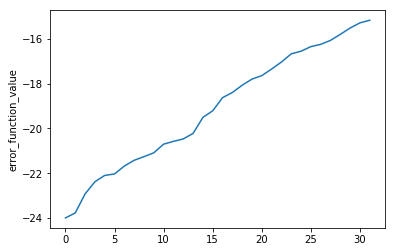

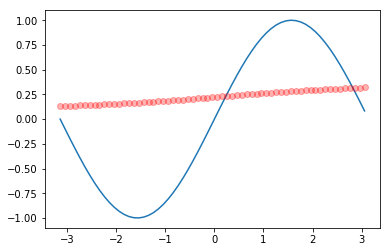

In [29]:
error_function_values = [__[1] for __ in bc]
plt.plot([i for i in range(len(error_function_values))],
         error_function_values)
plt.ylabel('error_function_value')
plt.show()


net_y = [best_net.output([__]) for __ in x]

plt.plot(x, y, '-')
plt.plot(x, net_y, 'ro', alpha = 0.3)
plt.show()

**Far from good.**

### Print out Fitted Weights

In [30]:
for i in range(len(best_net.layers[0])):
    print(best_net.layers[0][i].weights)

print()

for i in range(len(best_net.layers[1])):
    print(best_net.layers[1][i].weights)

[-0.8325163  -0.54851497]
[-0.29685914  0.05149991]
[-0.01123035 -0.73653736]

[-0.73941466 -1.17055774 -0.66560651 -0.15861705]
